<a href="https://colab.research.google.com/github/practice-grounds-wpaarth24/CNN/blob/main/CNN_ImageClassification(Multiclass).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
url = "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip"
urllib.request.urlretrieve(url, "10_food_classes_all_data.zip")

('10_food_classes_all_data.zip', <http.client.HTTPMessage at 0x789acca44f70>)

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [1]:
import os
import pathlib
import numpy as np

data_dir = pathlib.Path("10_food_classes_all_data/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(directory):
  rand_index = random.randint(0, 9)
  class_names[rand_index]
  folder = directory + class_names[rand_index]
  img_path = random.choice(os.listdir(folder))
  img = mpimg.imread(folder + "/" + img_path)
  plt.imshow(img)
  plt.title(class_names[rand_index])
  plt.axis("off")
  return img

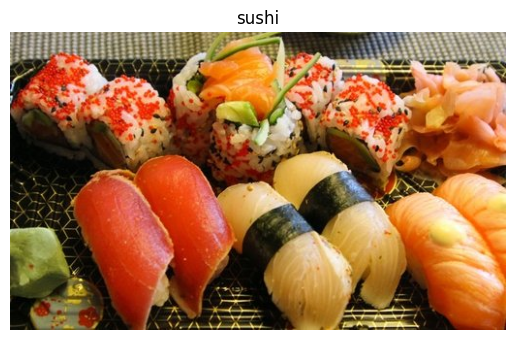

In [3]:
img = view_random_image("10_food_classes_all_data/train/")

In [4]:
img.shape

(308, 512, 3)

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_dir = "10_food_classes_all_data/train"
valid_dir = "10_food_classes_all_data/test"

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1/255.)


In [7]:
train_data = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=25,
                                               class_mode="categorical")
valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               target_size=(224, 224),
                                               batch_size=25,
                                               class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(22, 3, activation="relu"),
    tf.keras.layers.Conv2D(22, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2, padding="valid"),
    tf.keras.layers.Conv2D(22, 3, activation="relu"),
    tf.keras.layers.Conv2D(22, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
 ])

In [23]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [30]:
model.fit(train_data, epochs=3, validation_data=valid_data)

Epoch 1/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 237s 784ms/step - accuracy: 0.5403 - loss: 1.3755 - val_accuracy: 0.5692 - val_loss: 1.3565
Epoch 2/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 246s 813ms/step - accuracy: 0.5530 - loss: 1.3503 - val_accuracy: 0.5876 - val_loss: 1.2623
Epoch 3/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 244s 808ms/step - accuracy: 0.5422 - loss: 1.3710 - val_accuracy: 0.6100 - val_loss: 1.2284


In [31]:
#model trained for 20 epochs
model.evaluate(valid_data)

100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 175ms/step - accuracy: 0.6031 - loss: 1.2394


[1.2284107208251953, 0.6100000143051147]

In [26]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 222, 222, 22)        │             616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 220, 220, 22)        │           4,378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 110, 110, 22)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 108, 108, 22)        │           4,378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 106, 106, 22)        │           4,378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 53, 53, 22)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 61798)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │         617,990 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,895,222 (7.23 MB)

 Trainable params: 631,740 (2.41 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,263,482 (4.82 MB)